# TP4 : Classification supervisée.
Dans ce TP, nous allons utiliser les Machines à Vecteurs de Support (SVM), Perceptron Multicouche (MLP) et K-plus proches voisins (KNN) pour mettre en oeuvre des méthodes de classifications supervisées. 
## K plus proches voisins (KNN).

### Test sur des blobs.

In [7]:
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Fonction d'affichage des zones de décision (séparation entre classes).
def plot_classif_result(X, y, clf, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    h = 0.1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Génération des données
Xd, yd = datasets.make_blobs(n_features=2, centers=[(-3, -3), (3, 3)], cluster_std=2)

# Séparation en données d'apprentissage et de test.
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.5, random_state=42)

# Affichage des données d'entraînement
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.title('dataset')

# 1. Rendre la classification plus difficile : 
# Augmenter la variance des blobs pour rendre la séparation plus difficile.
Xd, yd = datasets.make_blobs(n_features=2, centers=[(-2, -2), (2, 2)], cluster_std=4)

# Séparation en données d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.5, random_state=42)

# 2. Faire varier le nombre de voisins
# Test avec 1 voisin
NN_1 = neighbors.KNeighborsClassifier(n_neighbors=1)
NN_1.fit(X_train, y_train)
print("Score entraînement 1-NN : %.2f" % NN_1.score(X_train, y_train))
print("Score test 1-NN : %.2f" % NN_1.score(X_test, y_test))
plot_classif_result(X_train, y_train, NN_1, "1 NN sur train set")
plot_classif_result(X_test, y_test, NN_1, "1 NN sur test set")

# Test avec 15 voisins
NN_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
NN_15.fit(X_train, y_train)
print("Score entraînement 15-NN : %.2f" % NN_15.score(X_train, y_train))
print("Score test 15-NN : %.2f" % NN_15.score(X_test, y_test))
plot_classif_result(X_train, y_train, NN_15, "15 NN sur train set")
plot_classif_result(X_test, y_test, NN_15, "15 NN sur test set")


Score entraînement 1-NN : 1.00
Score test 1-NN : 0.60
Score entraînement 15-NN : 0.80
Score test 15-NN : 0.64


* Régler les paramètres pour rendre la classification plus difficile. 
* Faire varier le nombre de voisins impliqués dans le vote. 
* Dans quel cas se trouve-t-on dans un cas de surapprentissage (c'est à dire une classification bonne sur l'ensemble d'apprentissage et médiocre sur l'ensemble de test) ? 

### Test de l'algorithme KNN sur MNIST.

Dans le code qui suit on teste l'algorithme des KNN sur la base MNIST:
* Pourquoi diviser en un ensemble de test et un ensemble d'aprentissage (train) ?
* Que déduire du rapport de classification ? 
* Comment lire la matrice de confusion ?
* Au vu de l'affichage des images et étiquettes associées, les erreurs que commet l'algorithme vous paraissent-elles acceptables ?

In [8]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Chargement des données
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# On divise notre ensemble en une partie train et une partie test.
# Pourquoi diviser en un ensemble de test et un ensemble d'apprentissage (train) ?
# L'ensemble d'apprentissage (train) est utilisé pour entraîner le modèle,
# tandis que l'ensemble de test est utilisé pour évaluer la performance du modèle sur des données qu'il n'a pas vues.
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.5, random_state=42)

# On met en place la classification avec KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_nn = knn.predict(X_test)

# Fonction d'affichage des images et des étiquettes
def affichage_150_images(X_test, y_test, y_pred):
    plt.figure(figsize=[15,12])
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],(8,8)), cmap='gray_r', vmin=0, vmax=16)
        if y_pred[n] == y_test[n]:
            plt.text(0.1, 0.1, str(y_pred[n])+' / '+str(y_test[n]), fontsize=6, bbox=dict(facecolor='white', alpha=1))
        else:
            plt.text(0.1, 0.1, str(y_pred[n])+' / '+str(y_test[n]), fontsize=6, bbox=dict(facecolor='red', alpha=1))
    plt.suptitle('Plus proche voisin: prédiction / réel')

# Affichage des images et des labels
affichage_150_images(X_test, y_test, y_pred_nn)

# Rapport de classification
print(metrics.classification_report(y_test, y_pred_nn))

# Matrice de confusion
print(metrics.confusion_matrix(y_test, y_pred_nn))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.97      1.00      0.98        89
           2       1.00      1.00      1.00        83
           3       0.99      0.95      0.97        93
           4       0.99      1.00      0.99        93
           5       0.98      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.95      1.00      0.97        87
           8       0.95      0.94      0.95        83
           9       0.96      0.93      0.95        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  2  3  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0 95  1  0  0  3]
 [ 1  0  0  0  0  1 96  0  0  0]
 [ 0  0  0

# On cherche le bon nombre de voisins impliqués dans le vote. 
* Que fait la fonction ```cross_val_score``` (voir la doc) ?
* Quel score est utilisé pour l'estimation de la qualité de la classification ? 
* Dans le cas présenté, quel est le bon nombre de voisins à utiliser ?

* cross_val_score est utilisé pour obtenir une estimation de la précision du modèle via la validation croisée.
* Le score utilisé pour l'évaluation est la précision (accuracy).
* Le meilleur nombre de voisins est 2.


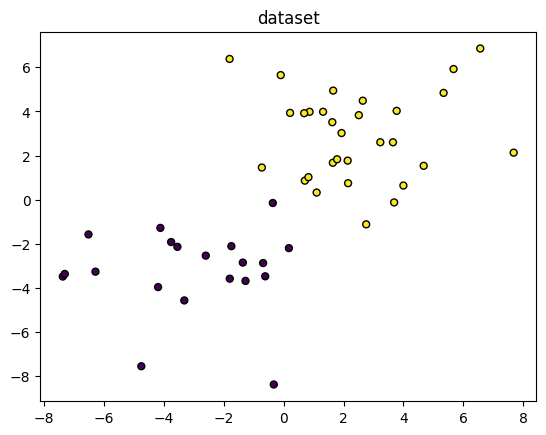

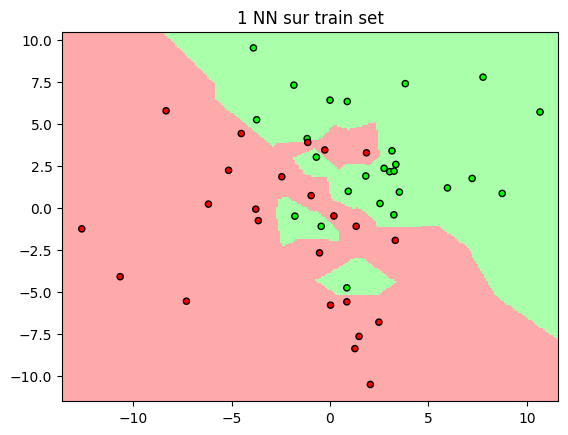

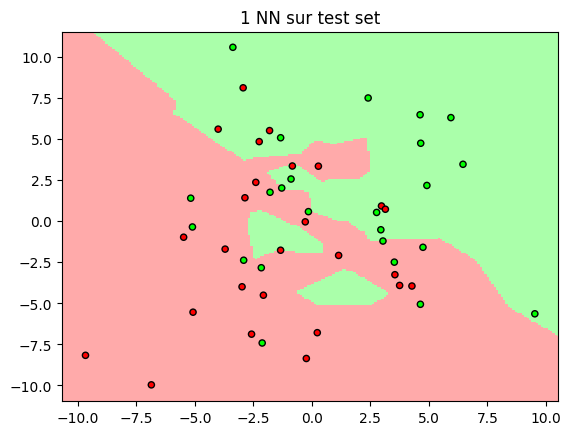

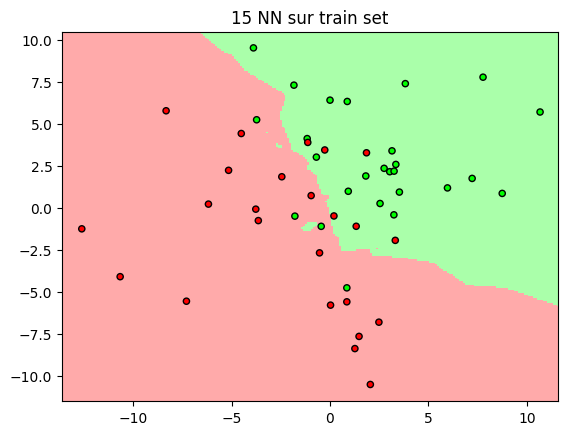

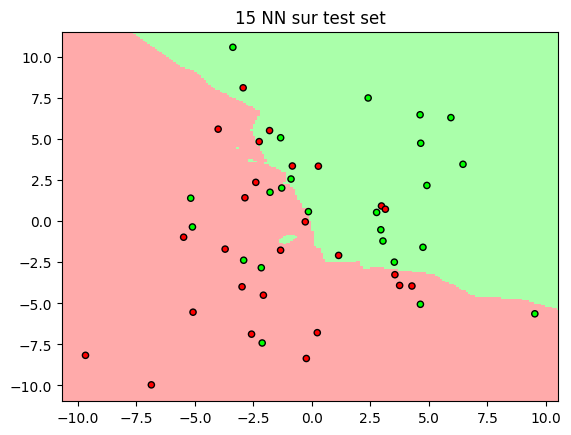

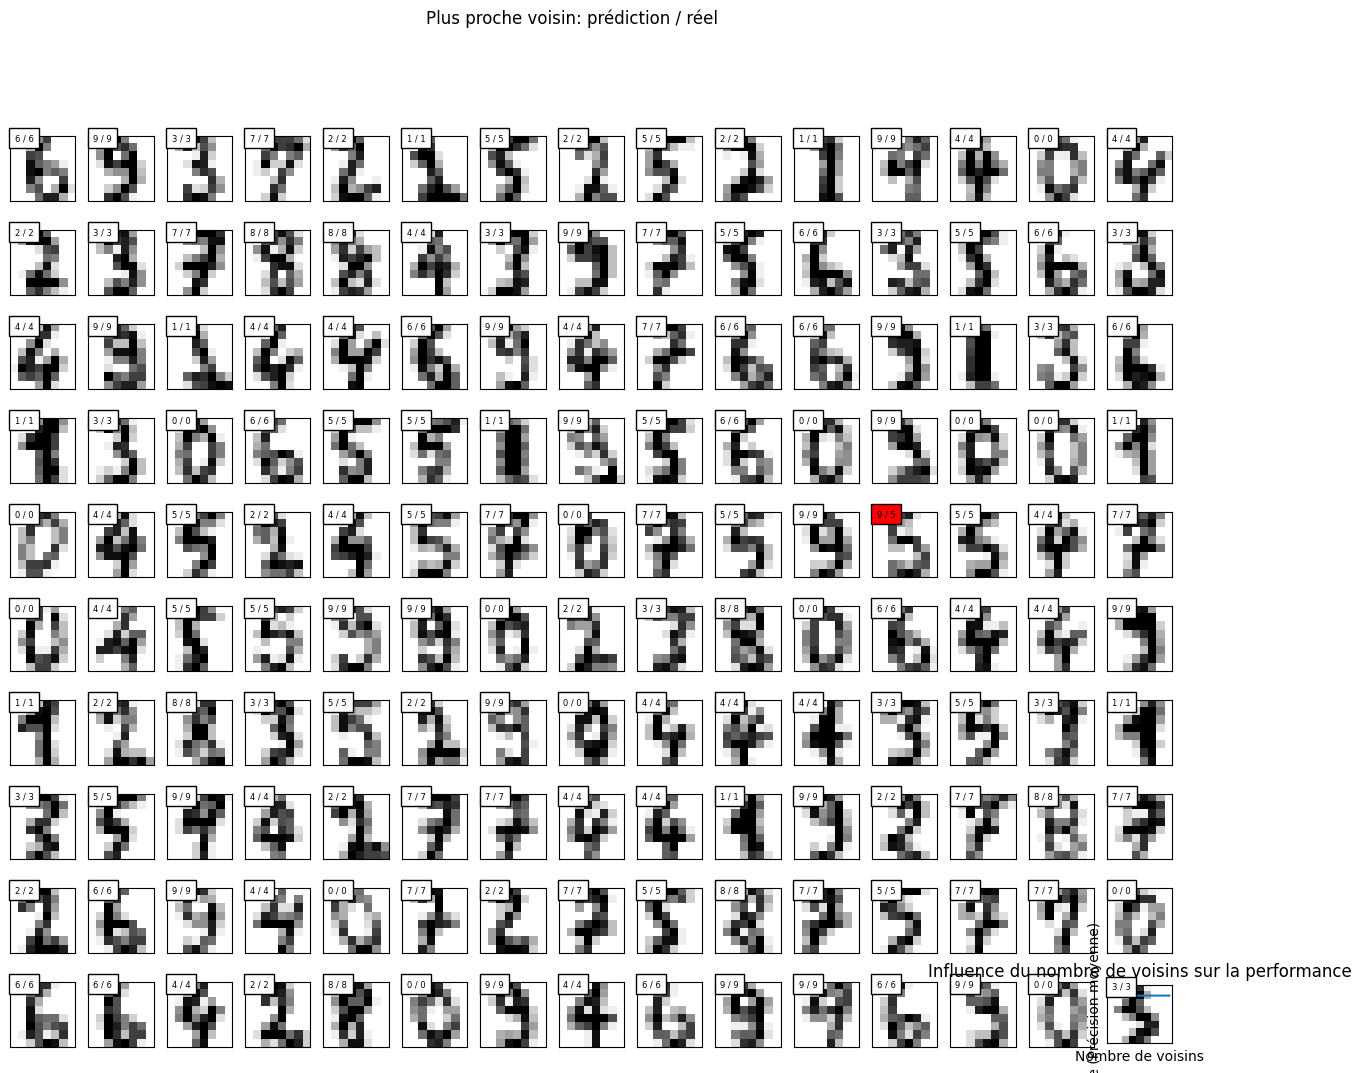

Le meilleur nombre de voisins est : 2


In [9]:
from sklearn import datasets, neighbors
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Chargement des données
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Nombre maximum de voisins à tester
N_n_max = 8
scores = np.empty((N_n_max, 1), float)

# Validation croisée avec 5 folds
KFold = 5

# Boucle pour tester différents nombres de voisins
for K in range(1, N_n_max + 1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=K)
    # Utilisation de cross_val_score pour obtenir le score moyen de la validation croisée
    scores[K - 1] = np.mean(cross_val_score(knn, X_digits, y_digits, cv=KFold))

# Tracer le score en fonction du nombre de voisins
plt.plot(range(1, N_n_max + 1), scores)
plt.xlabel('Nombre de voisins')
plt.ylabel('Score (Précision moyenne)')
plt.title('Influence du nombre de voisins sur la performance')
plt.show()

# Affichage du meilleur nombre de voisins
best_k = np.argmax(scores) + 1  # Le nombre de voisins ayant donné le meilleur score
print(f"Le meilleur nombre de voisins est : {best_k}")


# Recherche exhaustive et validation croisée.
Au lieu de faire la recherche des bons paramètres en regardant des courbes, on peut utiliser la fonction ```GridSearchCV```. On lui donne des jeux de paramètres à tester et l'algorithme fait une recherche à partir de validations croisées (elle est pas belle la vie quand même ?) 

In [10]:
from sklearn import datasets, neighbors
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Chargement des données
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Paramètres à tester dans la recherche exhaustive
parameters = {
    'metric': ('minkowski', 'manhattan'),
    'n_neighbors': range(1, 8)  # Test de n_neighbors entre 1 et 7
}

# Création du classifieur KNN
knn = neighbors.KNeighborsClassifier()

# Recherche des meilleurs paramètres via GridSearchCV
clf = GridSearchCV(knn, parameters)
clf.fit(X_digits, y_digits)

# Affichage des meilleurs paramètres et du meilleur modèle
print("Meilleur classifieur trouvé : ", clf.best_estimator_)
print("Meilleurs paramètres : ", clf.best_params_)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.5, random_state=42)

# Entraînement avec le meilleur modèle
clf.best_estimator_.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_nn = clf.best_estimator_.predict(X_test)

# Rapport de classification
print("Rapport de classification : ")
print(metrics.classification_report(y_test, y_pred_nn))

# Matrice de confusion
print("Matrice de confusion : ")
print(metrics.confusion_matrix(y_test, y_pred_nn))


Meilleur classifieur trouvé :  KNeighborsClassifier(n_neighbors=2)
Meilleurs paramètres :  {'metric': 'minkowski', 'n_neighbors': 2}
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.95      1.00      0.97        89
           2       1.00      1.00      1.00        83
           3       0.97      0.98      0.97        93
           4       0.99      0.98      0.98        93
           5       0.99      0.99      0.99        99
           6       1.00      0.99      0.99        98
           7       0.97      1.00      0.98        87
           8       0.99      0.95      0.97        83
           9       0.99      0.93      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

Matrice de confusion : 
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0

# SVM

Mettre en oeuvre les SVM sur les données suivantes. Changer les noyaux et faire varier les paramètres alpha et C pour voir l'influence. 


Testing SVM with kernel=linear and C=0.1


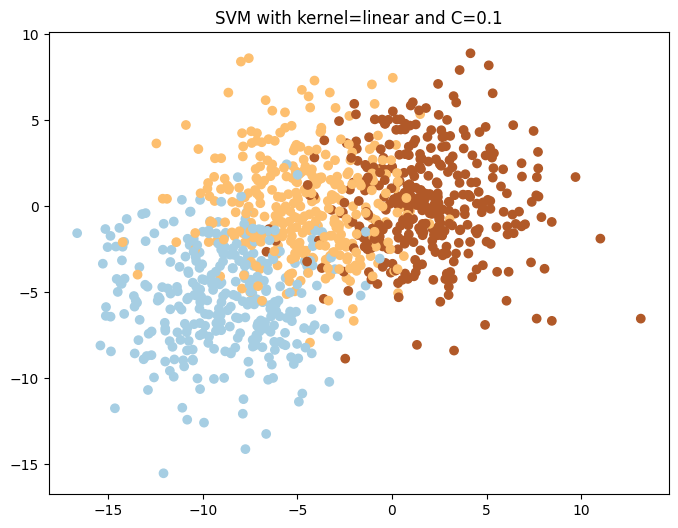

Accuracy: 0.8444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.80      0.73      0.76       161
           2       0.83      0.89      0.86       157

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495

Confusion Matrix:
[[162  14   1]
 [ 16 117  28]
 [  2  16 139]]
--------------------------------------------------
Testing SVM with kernel=linear and C=1


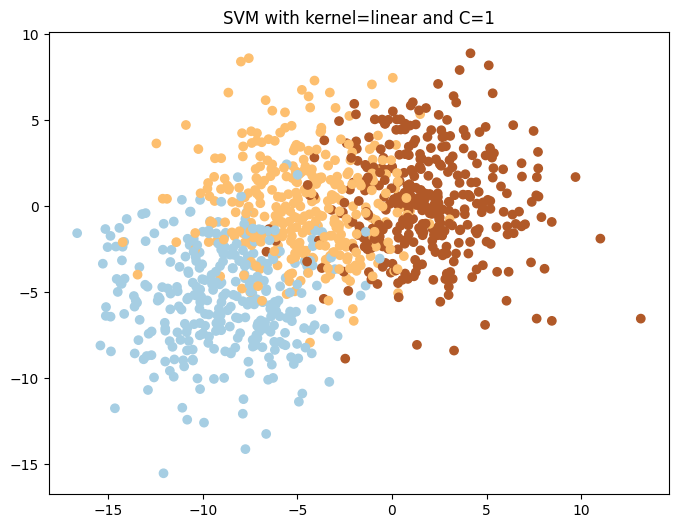

Accuracy: 0.8444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.80      0.73      0.76       161
           2       0.83      0.89      0.86       157

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495

Confusion Matrix:
[[162  14   1]
 [ 16 117  28]
 [  2  16 139]]
--------------------------------------------------
Testing SVM with kernel=linear and C=10


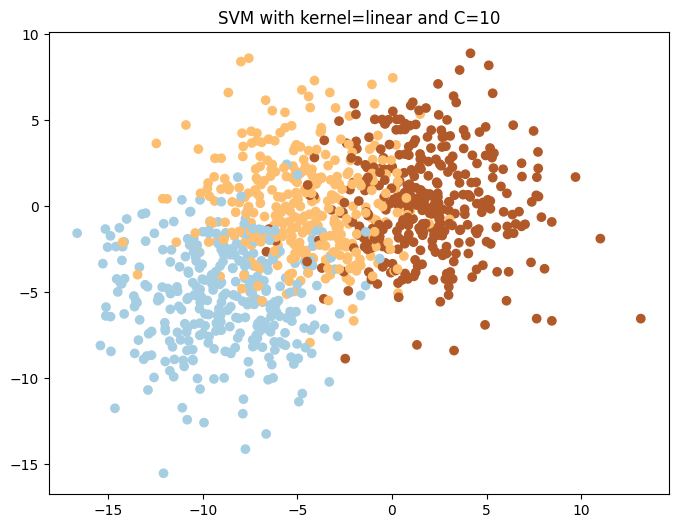

Accuracy: 0.8444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.80      0.73      0.76       161
           2       0.83      0.89      0.86       157

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495

Confusion Matrix:
[[162  14   1]
 [ 16 117  28]
 [  2  16 139]]
--------------------------------------------------
Testing SVM with kernel=poly and C=0.1


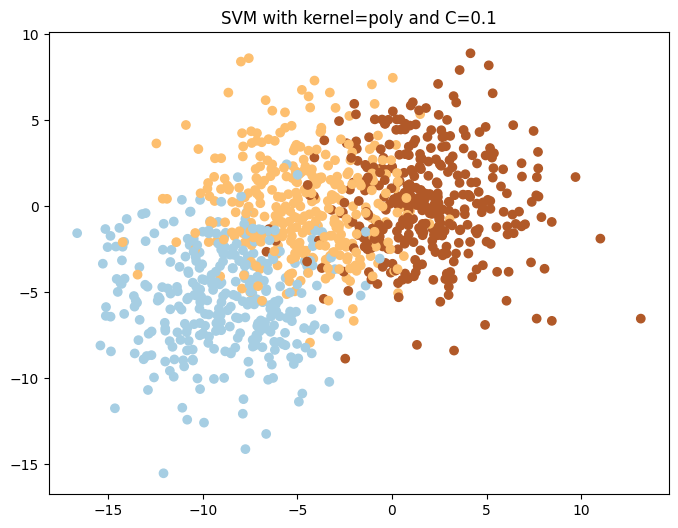

Accuracy: 0.7737373737373737
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       177
           1       0.77      0.47      0.58       161
           2       0.66      0.96      0.78       157

    accuracy                           0.77       495
   macro avg       0.79      0.77      0.76       495
weighted avg       0.79      0.77      0.76       495

Confusion Matrix:
[[157  18   2]
 [ 11  75  75]
 [  2   4 151]]
--------------------------------------------------
Testing SVM with kernel=poly and C=1


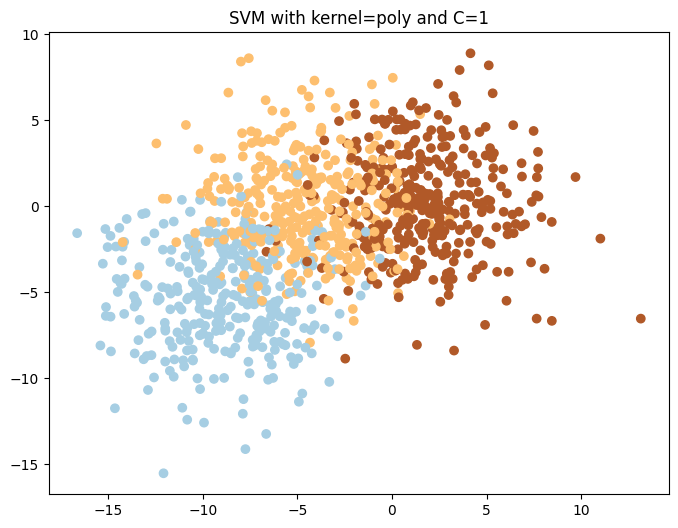

Accuracy: 0.8101010101010101
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.80      0.58      0.68       161
           2       0.72      0.95      0.82       157

    accuracy                           0.81       495
   macro avg       0.82      0.81      0.80       495
weighted avg       0.82      0.81      0.80       495

Confusion Matrix:
[[158  17   2]
 [ 11  94  56]
 [  2   6 149]]
--------------------------------------------------
Testing SVM with kernel=poly and C=10


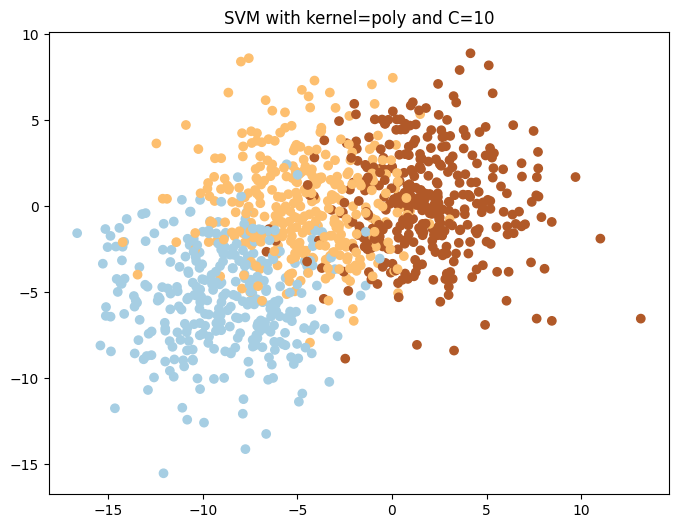

Accuracy: 0.8121212121212121
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.79      0.61      0.69       161
           2       0.73      0.93      0.82       157

    accuracy                           0.81       495
   macro avg       0.81      0.81      0.80       495
weighted avg       0.82      0.81      0.81       495

Confusion Matrix:
[[158  17   2]
 [ 11  98  52]
 [  2   9 146]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=0.1


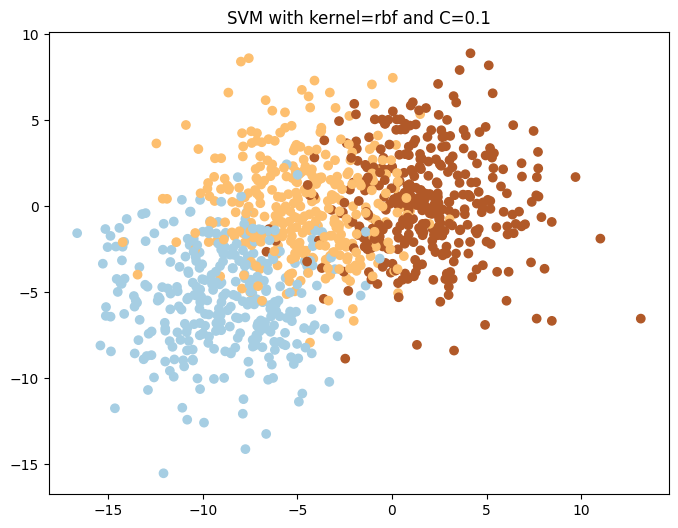

Accuracy: 0.8424242424242424
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.79      0.72      0.76       161
           2       0.82      0.89      0.85       157

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495

Confusion Matrix:
[[162  14   1]
 [ 16 116  29]
 [  2  16 139]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=1


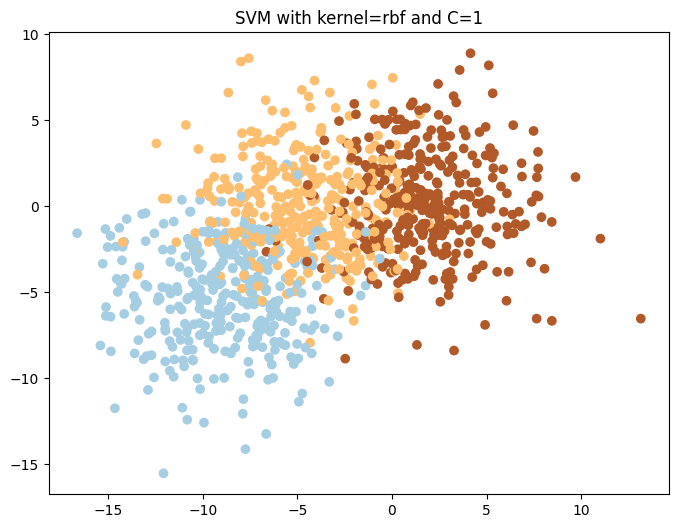

Accuracy: 0.8424242424242424
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.79      0.73      0.76       161
           2       0.83      0.88      0.85       157

    accuracy                           0.84       495
   macro avg       0.84      0.84      0.84       495
weighted avg       0.84      0.84      0.84       495

Confusion Matrix:
[[162  14   1]
 [ 16 117  28]
 [  2  17 138]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=10


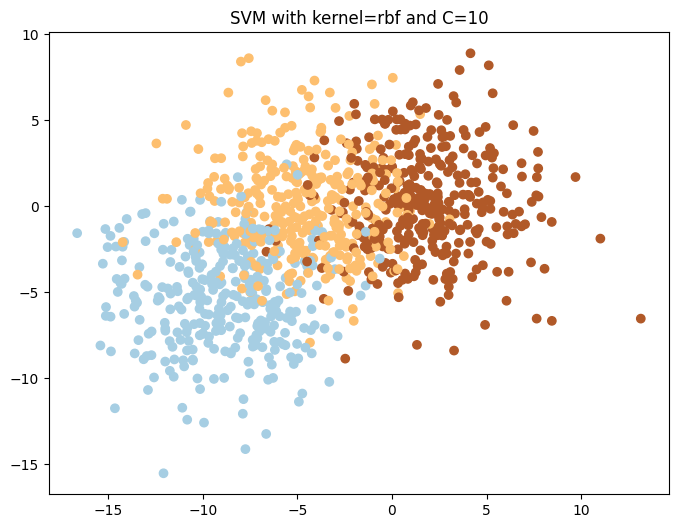

Accuracy: 0.8343434343434344
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       177
           1       0.77      0.73      0.75       161
           2       0.82      0.87      0.84       157

    accuracy                           0.83       495
   macro avg       0.83      0.83      0.83       495
weighted avg       0.83      0.83      0.83       495

Confusion Matrix:
[[160  16   1]
 [ 15 117  29]
 [  2  19 136]]
--------------------------------------------------

Testing with different data distributions (cluster_std variations)
Testing SVM with kernel=linear and C=0.1


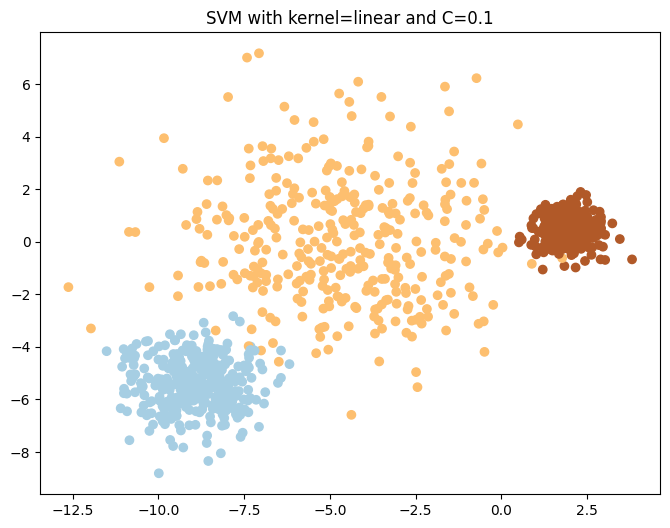

Accuracy: 0.9717171717171718
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       177
           1       0.99      0.92      0.95       161
           2       0.95      1.00      0.97       157

    accuracy                           0.97       495
   macro avg       0.97      0.97      0.97       495
weighted avg       0.97      0.97      0.97       495

Confusion Matrix:
[[176   1   0]
 [  4 148   9]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=linear and C=1


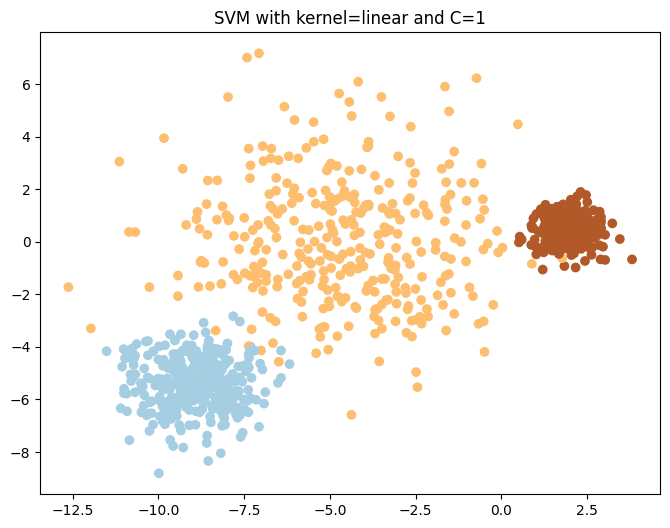

Accuracy: 0.9737373737373738
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       177
           1       0.99      0.93      0.96       161
           2       0.95      1.00      0.98       157

    accuracy                           0.97       495
   macro avg       0.97      0.97      0.97       495
weighted avg       0.97      0.97      0.97       495

Confusion Matrix:
[[176   1   0]
 [  4 149   8]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=linear and C=10


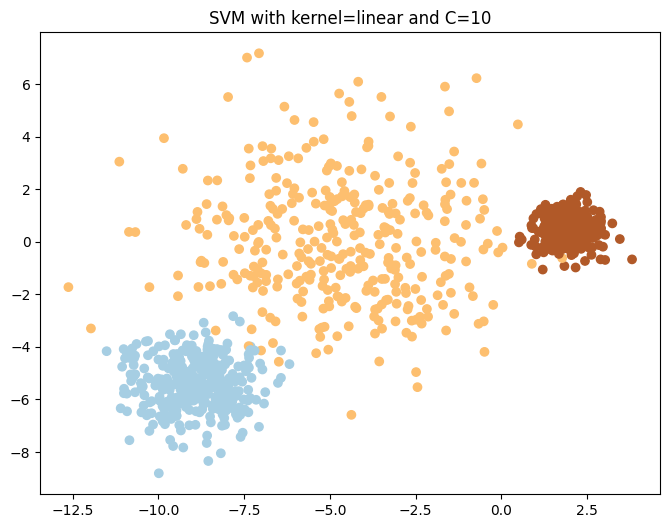

Accuracy: 0.9737373737373738
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       177
           1       0.99      0.93      0.96       161
           2       0.96      1.00      0.98       157

    accuracy                           0.97       495
   macro avg       0.97      0.97      0.97       495
weighted avg       0.97      0.97      0.97       495

Confusion Matrix:
[[176   1   0]
 [  5 149   7]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=poly and C=0.1


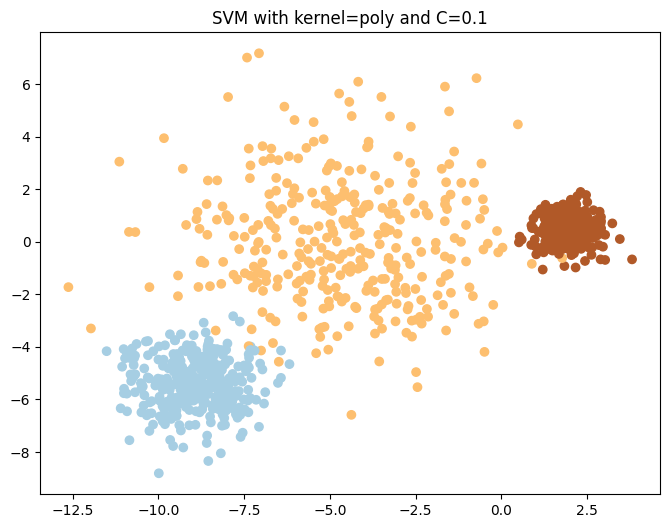

Accuracy: 0.8767676767676768
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.63      0.77       161
           2       0.73      1.00      0.84       157

    accuracy                           0.88       495
   macro avg       0.90      0.87      0.87       495
weighted avg       0.91      0.88      0.87       495

Confusion Matrix:
[[176   1   0]
 [  2 101  58]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=poly and C=1


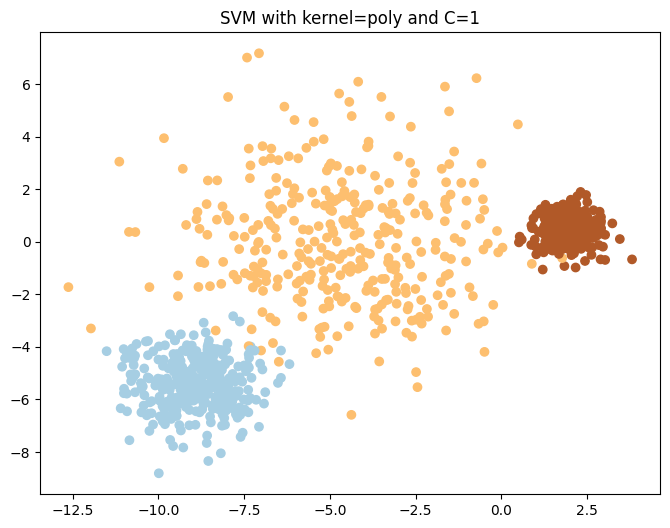

Accuracy: 0.9131313131313131
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.74      0.85       161
           2       0.80      1.00      0.89       157

    accuracy                           0.91       495
   macro avg       0.93      0.91      0.91       495
weighted avg       0.93      0.91      0.91       495

Confusion Matrix:
[[176   1   0]
 [  2 119  40]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=poly and C=10


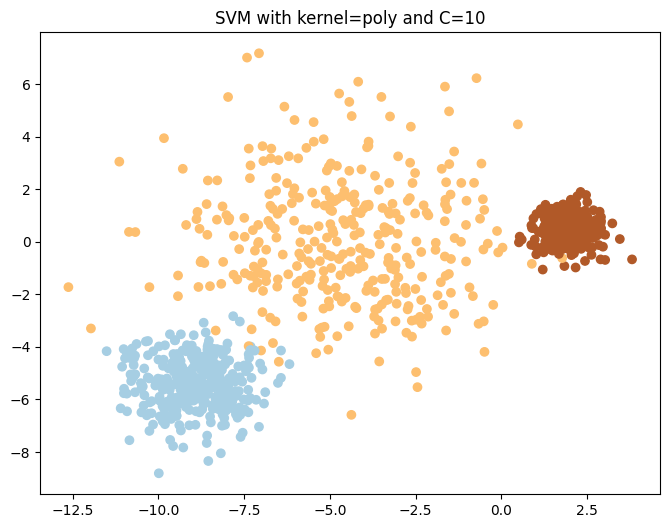

Accuracy: 0.9393939393939394
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.83      0.90       161
           2       0.86      1.00      0.92       157

    accuracy                           0.94       495
   macro avg       0.94      0.94      0.94       495
weighted avg       0.95      0.94      0.94       495

Confusion Matrix:
[[175   2   0]
 [  2 133  26]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=0.1


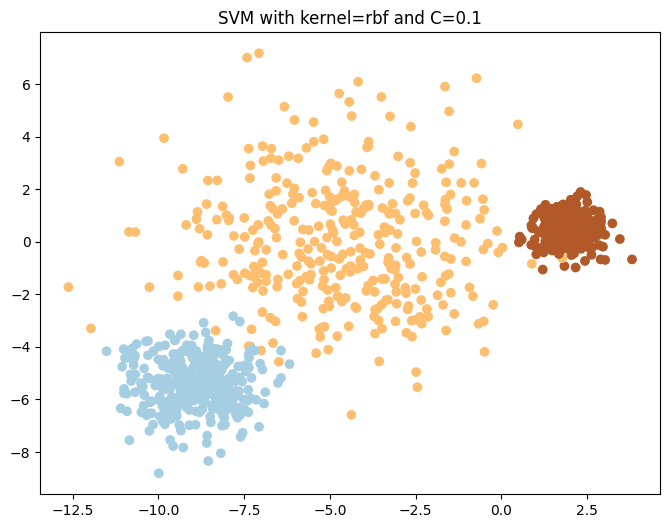

Accuracy: 0.9717171717171718
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       177
           1       1.00      0.91      0.95       161
           2       0.93      1.00      0.97       157

    accuracy                           0.97       495
   macro avg       0.97      0.97      0.97       495
weighted avg       0.97      0.97      0.97       495

Confusion Matrix:
[[177   0   0]
 [  3 147  11]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=1


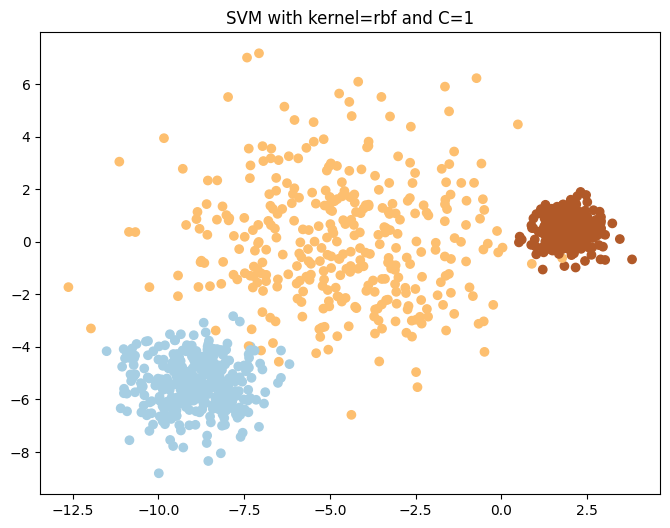

Accuracy: 0.9818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       177
           1       1.00      0.94      0.97       161
           2       0.96      1.00      0.98       157

    accuracy                           0.98       495
   macro avg       0.98      0.98      0.98       495
weighted avg       0.98      0.98      0.98       495

Confusion Matrix:
[[177   0   0]
 [  2 152   7]
 [  0   0 157]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=10


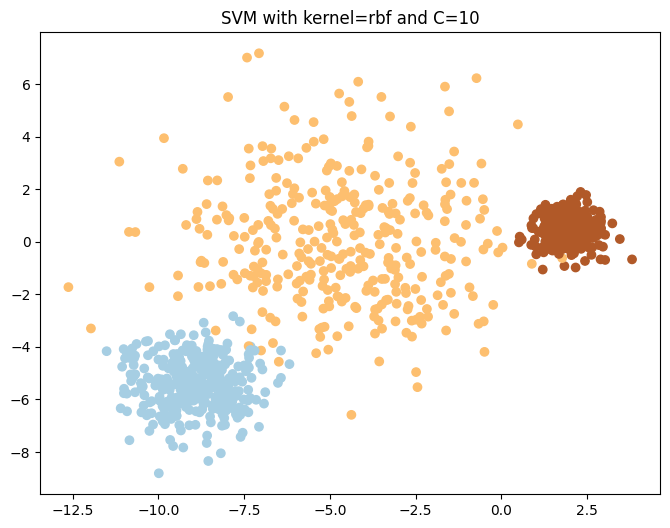

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.99      0.94      0.97       161
           2       0.96      1.00      0.98       157

    accuracy                           0.98       495
   macro avg       0.98      0.98      0.98       495
weighted avg       0.98      0.98      0.98       495

Confusion Matrix:
[[175   2   0]
 [  2 152   7]
 [  0   0 157]]
--------------------------------------------------

Testing with different data distributions (cluster_std variations)
Testing SVM with kernel=linear and C=0.1


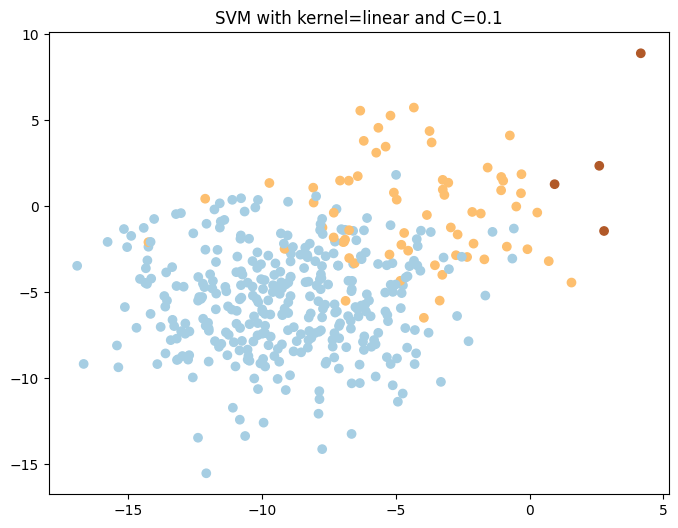

Accuracy: 0.9108910891089109
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       161
           1       0.79      0.66      0.72        35
           2       0.75      0.50      0.60         6

    accuracy                           0.91       202
   macro avg       0.83      0.71      0.76       202
weighted avg       0.90      0.91      0.91       202

Confusion Matrix:
[[158   3   0]
 [ 11  23   1]
 [  0   3   3]]
--------------------------------------------------
Testing SVM with kernel=linear and C=1


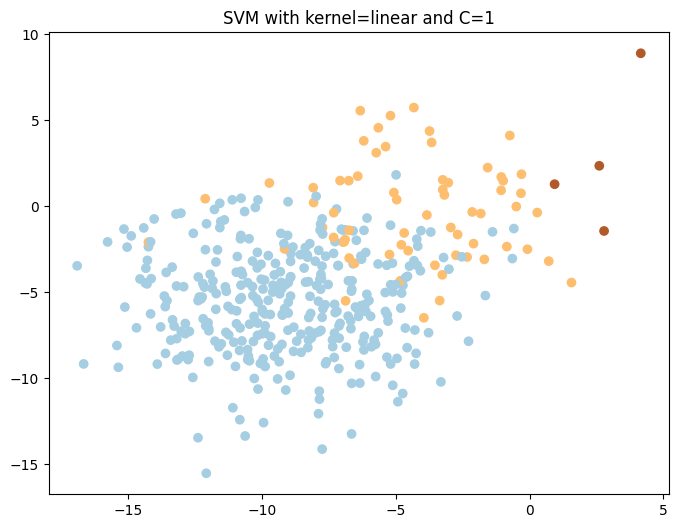

Accuracy: 0.9108910891089109
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       161
           1       0.79      0.66      0.72        35
           2       0.75      0.50      0.60         6

    accuracy                           0.91       202
   macro avg       0.83      0.71      0.76       202
weighted avg       0.90      0.91      0.91       202

Confusion Matrix:
[[158   3   0]
 [ 11  23   1]
 [  0   3   3]]
--------------------------------------------------
Testing SVM with kernel=linear and C=10


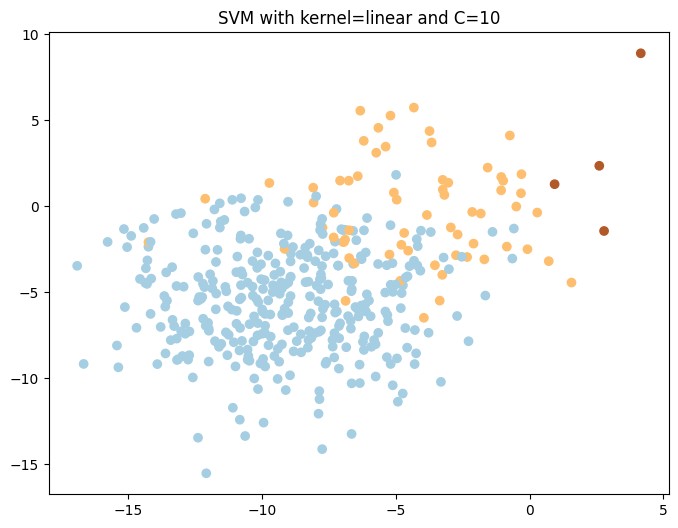

Accuracy: 0.900990099009901
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       161
           1       0.78      0.60      0.68        35
           2       0.50      0.50      0.50         6

    accuracy                           0.90       202
   macro avg       0.74      0.69      0.71       202
weighted avg       0.89      0.90      0.90       202

Confusion Matrix:
[[158   3   0]
 [ 11  21   3]
 [  0   3   3]]
--------------------------------------------------
Testing SVM with kernel=poly and C=0.1


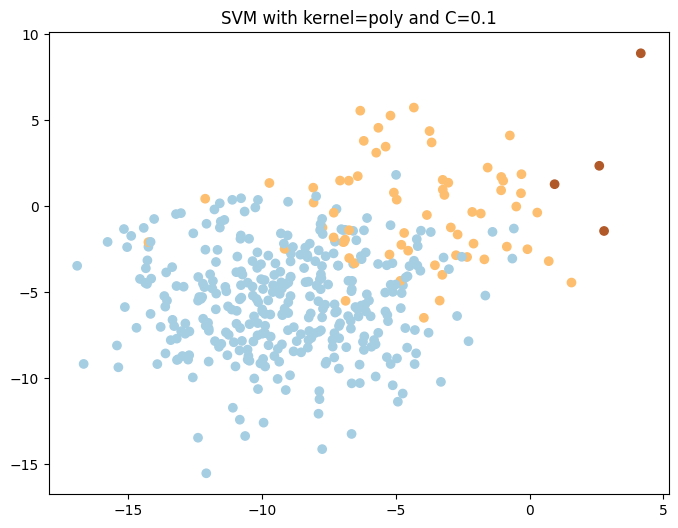

Accuracy: 0.9108910891089109
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       161
           1       0.69      0.89      0.78        35
           2       0.00      0.00      0.00         6

    accuracy                           0.91       202
   macro avg       0.55      0.61      0.58       202
weighted avg       0.90      0.91      0.90       202

Confusion Matrix:
[[153   8   0]
 [  4  31   0]
 [  0   6   0]]
--------------------------------------------------
Testing SVM with kernel=poly and C=1


c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


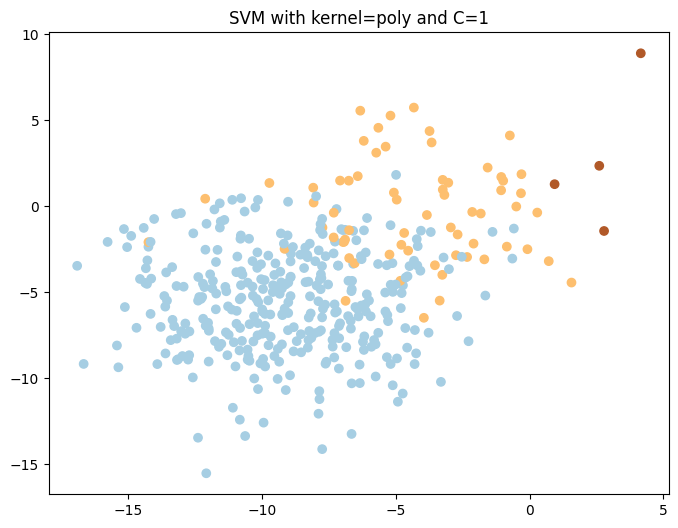

Accuracy: 0.9306930693069307
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       161
           1       0.76      0.89      0.82        35
           2       1.00      0.17      0.29         6

    accuracy                           0.93       202
   macro avg       0.91      0.67      0.69       202
weighted avg       0.94      0.93      0.92       202

Confusion Matrix:
[[156   5   0]
 [  4  31   0]
 [  0   5   1]]
--------------------------------------------------
Testing SVM with kernel=poly and C=10


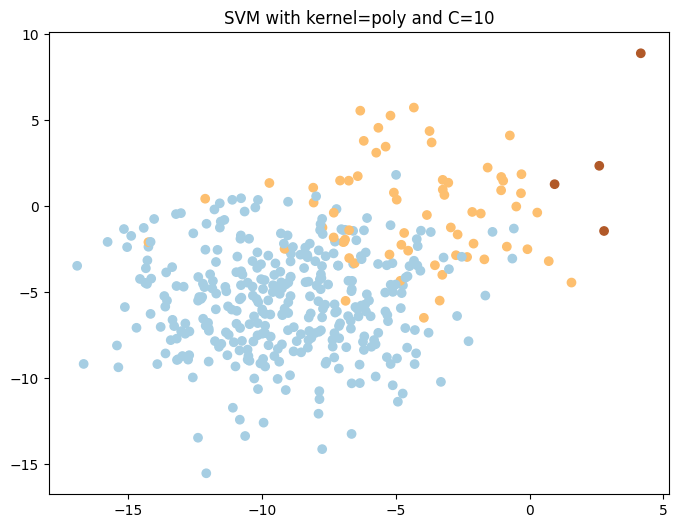

Accuracy: 0.9405940594059405
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       161
           1       0.79      0.89      0.84        35
           2       1.00      0.50      0.67         6

    accuracy                           0.94       202
   macro avg       0.92      0.78      0.83       202
weighted avg       0.94      0.94      0.94       202

Confusion Matrix:
[[156   5   0]
 [  4  31   0]
 [  0   3   3]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=0.1


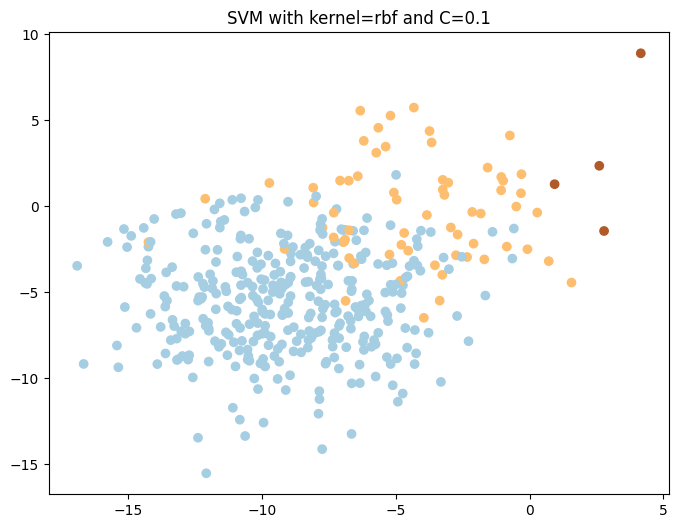

Accuracy: 0.8910891089108911
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       161
           1       0.84      0.60      0.70        35
           2       0.00      0.00      0.00         6

    accuracy                           0.89       202
   macro avg       0.58      0.53      0.55       202
weighted avg       0.86      0.89      0.87       202

Confusion Matrix:
[[159   2   0]
 [ 14  21   0]
 [  4   2   0]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=1


c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


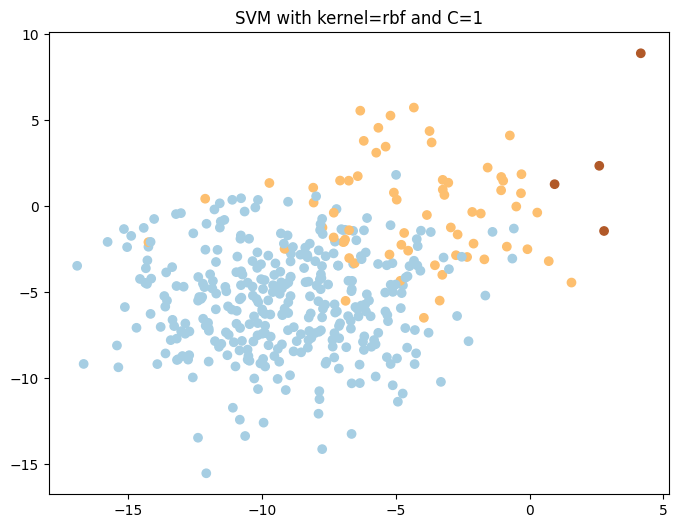

Accuracy: 0.900990099009901
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       161
           1       0.79      0.63      0.70        35
           2       1.00      0.17      0.29         6

    accuracy                           0.90       202
   macro avg       0.90      0.59      0.65       202
weighted avg       0.90      0.90      0.89       202

Confusion Matrix:
[[159   2   0]
 [ 13  22   0]
 [  1   4   1]]
--------------------------------------------------
Testing SVM with kernel=rbf and C=10


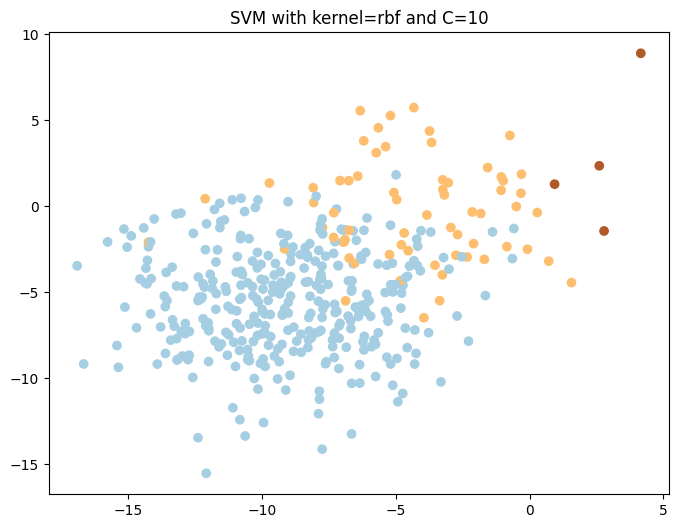

Accuracy: 0.905940594059406
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       161
           1       0.79      0.63      0.70        35
           2       0.75      0.50      0.60         6

    accuracy                           0.91       202
   macro avg       0.82      0.70      0.75       202
weighted avg       0.90      0.91      0.90       202

Confusion Matrix:
[[158   3   0]
 [ 12  22   1]
 [  0   3   3]]
--------------------------------------------------


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Paramètres de base
n_samples = 1500
random_state = 170

# Données de base (nuages de points)
X_base, y_base = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=3.0)

# Données anisotropiques
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X_base, transformation)

# Données avec différentes variances
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Taille variable des nuages
X_filtered = np.vstack((X_base[y_base == 0][:500], X_base[y_base == 1][:100], X_base[y_base == 2][:10]))
y_filtered = np.concatenate([y_base[y_base == 0][:500], y_base[y_base == 1][:100], y_base[y_base == 2][:10]])

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.33, random_state=42)

# Paramètres à tester : noyau et valeurs de C
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

# Fonction pour afficher les résultats
def plot_classif_result(X_train, y_train, clf, title):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Test des différentes configurations
for kernel in kernels:
    for C_value in C_values:
        print(f"Testing SVM with kernel={kernel} and C={C_value}")
        
        # Création du classifieur SVM
        clf = SVC(kernel=kernel, C=C_value)
        clf.fit(X_train, y_train)
        
        # Prédictions sur le jeu de test
        y_pred = clf.predict(X_test)
        
        # Affichage des résultats
        plot_classif_result(X_train, y_train, clf, f'SVM with kernel={kernel} and C={C_value}')
        
        # Calcul des scores
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        
        # Rapport de classification
        print("Classification Report:")
        print(metrics.classification_report(y_test, y_pred))
        
        # Matrice de confusion
        print("Confusion Matrix:")
        print(metrics.confusion_matrix(y_test, y_pred))
        print("-" * 50)

# Test avec d'autres variations de cluster_std (pour X_varied et X_filtered)
for X_data, y_data in [(X_varied, y_varied), (X_filtered, y_filtered)]:
    print(f"\nTesting with different data distributions (cluster_std variations)")
    
    # Séparation train/test
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
    
    for kernel in kernels:
        for C_value in C_values:
            print(f"Testing SVM with kernel={kernel} and C={C_value}")
            
            # Création du classifieur SVM
            clf = SVC(kernel=kernel, C=C_value)
            clf.fit(X_train, y_train)
            
            # Prédictions sur le jeu de test
            y_pred = clf.predict(X_test)
            
            # Affichage des résultats
            plot_classif_result(X_train, y_train, clf, f'SVM with kernel={kernel} and C={C_value}')
            
            # Calcul des scores
            accuracy = metrics.accuracy_score(y_test, y_pred)
            print(f"Accuracy: {accuracy}")
            
            # Rapport de classification
            print("Classification Report:")
            print(metrics.classification_report(y_test, y_pred))
            
            # Matrice de confusion
            print("Confusion Matrix:")
            print(metrics.confusion_matrix(y_test, y_pred))
            print("-" * 50)


Penser à faire varier l'argument cluster_std et observer les résultats. Faites aussi varier l'argument C du svm : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc

Penser à étudier les scores, rapport de précision et matrice de confusion. 

Regarder l'influence de l'argument kernel (poly, rbf par exemple). 

### Choix de paramètres par validation croisée et recherche sur un grille. 

On met en oeuvre une recherche exhaustive suivi d'une validation croisée : on teste plusieurs paramètres différents qui sont utilisés dans une validation croisée à 5 plis. Les meilleurs paramètres peuvent être ainsi extraits. 


In [12]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Charger le jeu de données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Paramètres à tester
parameters = {
    'kernel': ['linear', 'rbf'],  # Types de noyaux à tester
    'C': [1, 10]  # Valeurs du paramètre C à tester
}

# Création du modèle SVM
svc = svm.SVC()

# Recherche par grille avec validation croisée à 5 plis
clf = GridSearchCV(svc, parameters, cv=5)  # 5-fold cross-validation
clf.fit(X, y)

# Affichage du meilleur modèle trouvé
print("Meilleur classifieur trouvé :")
print(clf.best_estimator_)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres :")
print(clf.best_params_)

# Prédiction avec le meilleur modèle
y_pred = clf.predict(X)

# Rapport de classification
print("Classification Report:")
print(metrics.classification_report(y, y_pred))

# Matrice de confusion
print("Confusion Matrix:")
print(metrics.confusion_matrix(y, y_pred))


Meilleur classifieur trouvé :
SVC(C=1, kernel='linear')
Meilleurs paramètres :
{'C': 1, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]



### Exercice ouvert (à commenter en dessous).

On cherche à mettre en oeuvre un modèle SVM sur la base de données MNIST. 
* Mettre en oeuvre le SVM linéaire classique en subdivisant l'ensemble en test/train. 
* Afficher le rapport de classification et les matrices de confusion.
* Commenter et analyser les résultats. 
* Faire varier le paramètre C. 
* Voir l'influence du choix des noyaux (kernels) sur le résultat de classification. 
* Mettre en oeuvre une GridSearchCV pour choisir à la fois le noyau et le paramètre C. 
* Comparer à un modèle par perceptron multicouche. 


### 1. Importation des bibliothèques nécessaires

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

### 2. Charger les données MNIST

In [3]:
# Charger les données MNIST depuis OpenML
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convertir les labels en entiers
y = y.astype(int)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 3. Standardisation des données


In [4]:
# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. SVM Linéaire

In [5]:
# SVM linéaire avec C=1
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train_scaled, y_train)

# Prédictions sur les données de test
y_pred = clf.predict(X_test_scaled)

# Rapport de classification
print("Classification Report (SVM Linéaire):\n", metrics.classification_report(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix (SVM Linéaire):\n", metrics.confusion_matrix(y_test, y_pred))

Classification Report (SVM Linéaire):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2267
           1       0.94      0.98      0.96      2603
           2       0.88      0.90      0.89      2350
           3       0.88      0.91      0.89      2383
           4       0.91      0.94      0.92      2144
           5       0.90      0.88      0.89      2107
           6       0.96      0.94      0.95      2294
           7       0.94      0.92      0.93      2455
           8       0.92      0.85      0.89      2196
           9       0.92      0.89      0.90      2301

    accuracy                           0.92     23100
   macro avg       0.92      0.92      0.92     23100
weighted avg       0.92      0.92      0.92     23100

Confusion Matrix (SVM Linéaire):
 [[2190    1   12    5    6   21   22    2    5    3]
 [   0 2551   12    8    1    4    0    5   18    4]
 [  25   39 2114   44   32    8   26   21   34    7]
 [  11   

### 5. Faire varier le paramètre C

In [ ]:
from sklearn.svm import LinearSVC

# Tester différentes valeurs de C avec LinearSVC
for C in [0.1, 1, 10, 100]:
    clf = LinearSVC(C=C, max_iter=10000)  # max_iter pour s'assurer que le modèle converge
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"Classification Report for C={C} (LinearSVC):\n", metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("-" * 50)


Classification Report for C=0.1 (SVM Linéaire):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2267
           1       0.95      0.98      0.97      2603
           2       0.90      0.92      0.91      2350
           3       0.91      0.92      0.91      2383
           4       0.92      0.95      0.93      2144
           5       0.91      0.90      0.90      2107
           6       0.96      0.95      0.95      2294
           7       0.94      0.94      0.94      2455
           8       0.93      0.88      0.91      2196
           9       0.93      0.90      0.92      2301

    accuracy                           0.93     23100
   macro avg       0.93      0.93      0.93     23100
weighted avg       0.93      0.93      0.93     23100

Confusion Matrix:
[[2193    1   11    6    5   21   22    2    5    1]
 [   0 2561   11   10    1    5    1    4    6    4]
 [  21   31 2153   23   32    7   21   21   33    8]
 [  12    8   5

### 6. Influence du choix des noyaux (kernel)

In [ ]:
# Tester différents noyaux
for kernel in ['linear', 'rbf', 'poly']:
    clf = svm.SVC(kernel=kernel, C=1)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"Classification Report for kernel={kernel}:\n", metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print("-" * 50)

### 7. Recherche GridSearchCV pour choisir le noyau et C

In [ ]:
# Paramètres à tester
parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}

# GridSearchCV
clf = GridSearchCV(svm.SVC(), parameters, cv=5)
clf.fit(X_train_scaled, y_train)

# Meilleurs paramètres
print("Best parameters found by GridSearchCV:\n", clf.best_params_)

# Prédictions avec les meilleurs paramètres
y_pred = clf.predict(X_test_scaled)

# Rapport de classification
print("Classification Report for best model (GridSearchCV):\n", metrics.classification_report(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix for best model (GridSearchCV):\n", metrics.confusion_matrix(y_test, y_pred))

### 8. Comparaison avec un modèle Perceptron Multicouche (MLP)

In [ ]:
# Perceptron multicouche (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Prédictions du MLP
y_pred_mlp = mlp.predict(X_test_scaled)

# Rapport de classification
print("Classification Report for MLP Classifier:\n", metrics.classification_report(y_test, y_pred_mlp))

# Matrice de confusion
print("Confusion Matrix for MLP Classifier:\n", metrics.confusion_matrix(y_test, y_pred_mlp))